```
                     | muaompc |  FiOrdOs  |  PIPG   | JuMP+mosek | Jump+gurobi
    nx = 10, nu = 20 | 6.0 ms  |  0.2 ms   | 0.4 ms  |   27.0 ms  |    31.0 ms
    nx = 4,  nu = 8  | 0.6 ms  |  0.087 ms | 0.07 ms |   17.0 ms  |    20.0 ms
    
muaompc, FiOrdOs and PIPG are warmstarted.
```

# Random MPC (input constrained) - MPC

## Problem definition

In [118]:
include("ex10_data_mpc.jl");

## Load tools

In [119]:
@load_file "pipg_suite.jl" true
@load_file "pipg_var.jl" true
@load_file "mpc_utils.jl" true;

## Run MPC

In [120]:
timeit_var = mpc_utils.execute_mpc!(:warm_feas,false);

                                 ..:: MPC Simulation ::..
-------------------------------------------------------------------------------------------
  Solve Instant  |   Dyn. Err.   |  Rel. Dist. to Opt. |   Solve Time (ms)  |  JuMP Status  
-------------------------------------------------------------------------------------------
Academic license - for non-commercial use only - expires 2021-05-13
        1        |  2.615359e-04 |      2.079e-03      |      6.69e+00      |   OPTIMAL
Academic license - for non-commercial use only - expires 2021-05-13
        2        |  2.124074e-04 |      1.602e-03      |      8.12e+00      |   OPTIMAL
Academic license - for non-commercial use only - expires 2021-05-13
        3        |  3.290850e-04 |      2.050e-03      |      8.03e+00      |   OPTIMAL
Academic license - for non-commercial use only - expires 2021-05-13
        4        |  2.010423e-04 |      2.239e-03      |      8.06e+00      |   OPTIMAL
Academic license - for non-commercial use

## Visualization

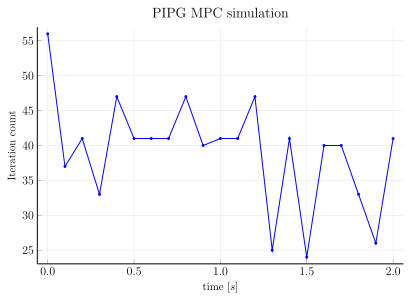

In [95]:
mpc_utils.plot_iter_count()

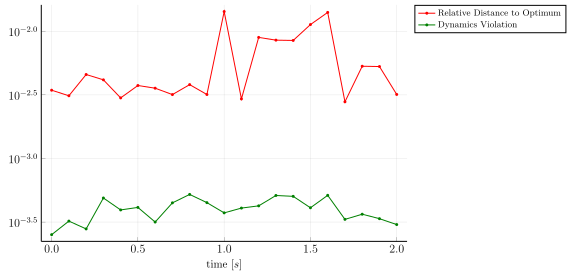

In [96]:
mpc_utils.plot_rd2o_dye()

In [90]:
# mpc_utils.plot_cum_proj()

## Benchmark MPC

In [91]:
# nx = 4, nu = 8
show(timeit_var)

 ──────────────────────────────────────────────────────────────────────────
                                   Time                   Allocations      
                           ──────────────────────   ───────────────────────
     Tot / % measured:          3.49s / 11.7%           84.6MiB / 92.2%    

 Section           ncalls     time   %tot     avg     alloc   %tot      avg
 ──────────────────────────────────────────────────────────────────────────
 JuMP + mosek          21    407ms   100%  19.4ms   78.0MiB  100%   3.71MiB
 PIPG                  21   1.48ms  0.36%  70.5μs     0.00B  0.00%    0.00B
 Warm-start PIPG       21   27.1μs  0.01%  1.29μs   2.30KiB  0.00%     112B
 Power iteration        1   12.7μs  0.00%  12.7μs     0.00B  0.00%    0.00B
 ──────────────────────────────────────────────────────────────────────────

In [105]:
# nx = 4, nu = 8
show(timeit_var)

 ──────────────────────────────────────────────────────────────────────────
                                   Time                   Allocations      
                           ──────────────────────   ───────────────────────
     Tot / % measured:          6.09s / 7.28%           68.9MiB / 99.3%    

 Section           ncalls     time   %tot     avg     alloc   %tot      avg
 ──────────────────────────────────────────────────────────────────────────
 JuMP + gurobi         21    442ms   100%  21.0ms   68.4MiB  100%   3.26MiB
 PIPG                  21   1.54ms  0.35%  73.6μs     0.00B  0.00%    0.00B
 Warm-start PIPG       21   29.3μs  0.01%  1.40μs   2.30KiB  0.00%     112B
 Power iteration        1   11.4μs  0.00%  11.4μs     0.00B  0.00%    0.00B
 ──────────────────────────────────────────────────────────────────────────

In [113]:
# nx = 10, nu = 20
show(timeit_var)

 ──────────────────────────────────────────────────────────────────────────
                                   Time                   Allocations      
                           ──────────────────────   ───────────────────────
     Tot / % measured:          7.29s / 7.89%            200MiB / 100%     

 Section           ncalls     time   %tot     avg     alloc   %tot      avg
 ──────────────────────────────────────────────────────────────────────────
 JuMP + mosek          21    567ms  98.6%  27.0ms    199MiB  100%   9.48MiB
 PIPG                  21   8.10ms  1.41%   386μs     0.00B  0.00%    0.00B
 Warm-start PIPG       21    108μs  0.02%  5.13μs   3.28KiB  0.00%     160B
 Power iteration        1   43.8μs  0.01%  43.8μs     0.00B  0.00%    0.00B
 ──────────────────────────────────────────────────────────────────────────

In [121]:
# nx = 10, nu = 20
show(timeit_var)

 ──────────────────────────────────────────────────────────────────────────
                                   Time                   Allocations      
                           ──────────────────────   ───────────────────────
     Tot / % measured:          18.8s / 3.56%            180MiB / 100%     

 Section           ncalls     time   %tot     avg     alloc   %tot      avg
 ──────────────────────────────────────────────────────────────────────────
 JuMP + gurobi         21    660ms  98.5%  31.4ms    179MiB  100%   8.52MiB
 PIPG                  21   9.89ms  1.48%   471μs     0.00B  0.00%    0.00B
 Warm-start PIPG       21   90.6μs  0.01%  4.32μs   3.28KiB  0.00%     160B
 Power iteration        1   64.5μs  0.01%  64.5μs     0.00B  0.00%    0.00B
 ──────────────────────────────────────────────────────────────────────────